In [16]:
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [3]:
df=pd.read_csv('vehicles.csv')

In [17]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [5]:
df.isna()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,True,True,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,True,True,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,True,True,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509572,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,False,False,True,False,False,False
509573,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,False,False,True,False,False,False
509574,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
509575,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,True,False,False,False


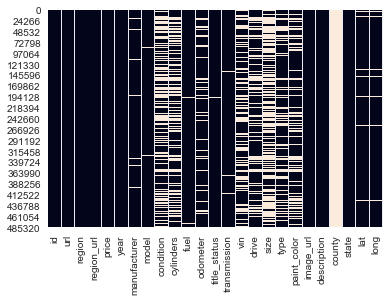

In [8]:
sns.heatmap(df.isna(), cbar=False)

In [14]:
df['county'].value_counts()

Series([], Name: county, dtype: int64)

In [15]:
df.isnull().mean()

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002997
manufacturer    0.044672
model           0.015678
condition       0.455150
cylinders       0.391860
fuel            0.007820
odometer        0.181178
title_status    0.006009
transmission    0.007298
vin             0.407053
drive           0.282868
size            0.671151
type            0.277742
paint_color     0.323221
image_url       0.000027
description     0.000031
county          1.000000
state           0.000000
lat             0.020197
long            0.020197
dtype: float64

In [ ]:
df['m']